In [2]:
import pandas as pd

# Load both files
df_parquet = pd.read_csv("lightcurve_features_26_negative.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")

In [3]:
combined = pd.concat([df_parquet, df_csv], ignore_index=True)

# Shuffle all rows
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
combined.to_parquet("baseline set with all neg and 100 pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'baseline set with all neg and 100 pos.parquet'")
print("Total rows:", len(combined))

Combined and shuffled dataset saved as 'baseline set with all neg and 100 pos.parquet'
Total rows: 1571


In [9]:
df_combined_baseline = pd.read_parquet("baseline set with all neg and 100 pos.parquet")
features_combined_baseline = df_combined_baseline .drop(columns=['object_name'], errors='ignore')
features_combined_baseline_numeric = features_combined_baseline.select_dtypes(include='number')
corr_combined_baseline = features_combined_baseline_numeric.corr()

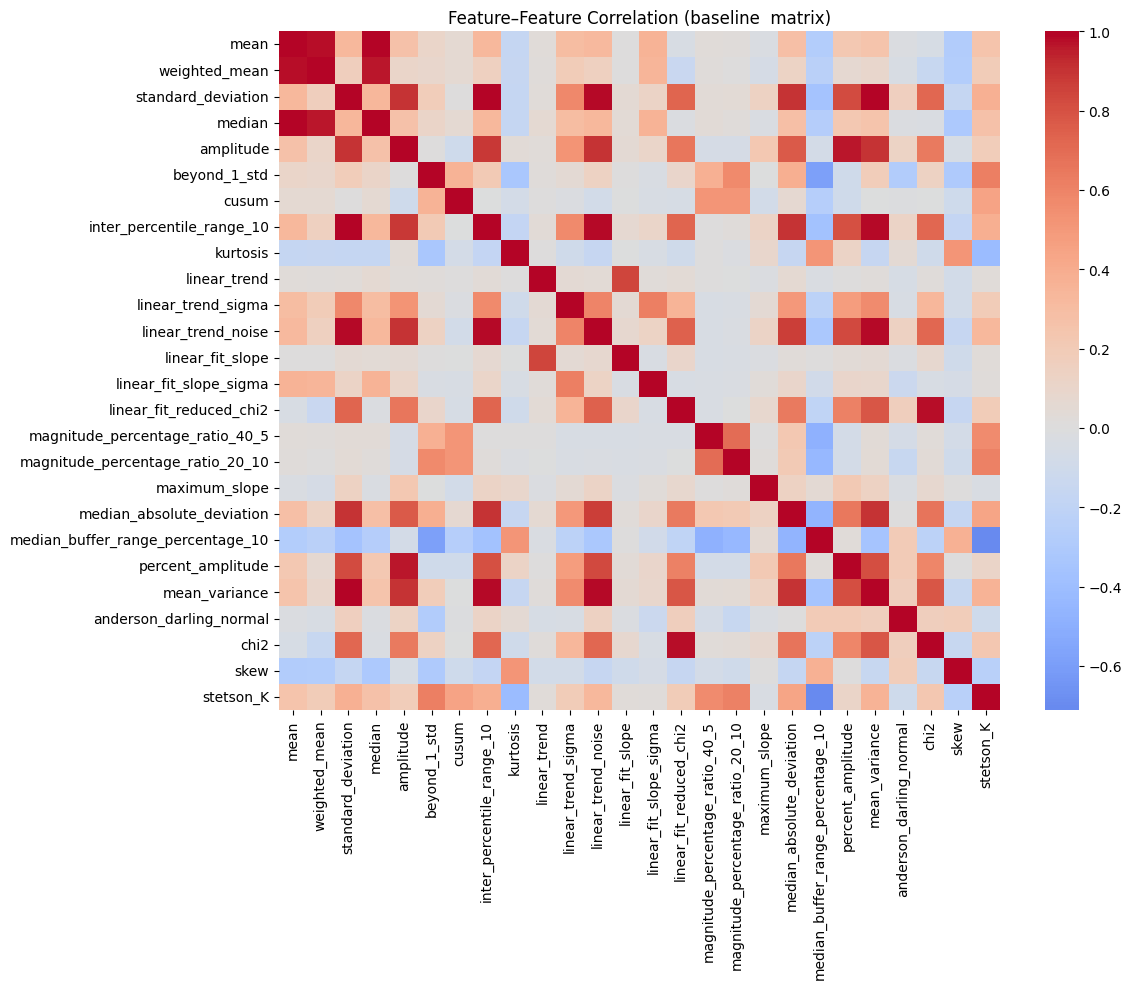

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (baseline  matrix)')
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import glob

# Find all 12 parquet files
neg_files = sorted(glob.glob("negative_subset_*.parquet"))

In [12]:
# Store sampled dataframes
sampled_list = []

In [13]:
# Sample 10 rows from each subset
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 10 rows (or all if file has <10)
    n = min(10, len(df))
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"

In [14]:
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_120.parquet", index=False)


In [15]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_120.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)


In [16]:
combined.to_parquet("subset of baseline with 120neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 120neg & pos.parquet'")
print("Total rows:", len(combined))

Combined and shuffled dataset saved as 'subset of baseline with 120neg & pos.parquet'
Total rows: 220


In [17]:
df_combined_baseline_subset_10 = pd.read_parquet("subset of baseline with 120neg & pos.parquet")
features_combined_baseline_subset_100 = df_combined_baseline_subset_10 .drop(columns=['object_name','cluster'], errors='ignore')
features_combined_baseline_subset_100_numeric = features_combined_baseline_subset_100.select_dtypes(include='number')
corr_combined_baseline_subset_100 = features_combined_baseline_subset_100_numeric.corr()

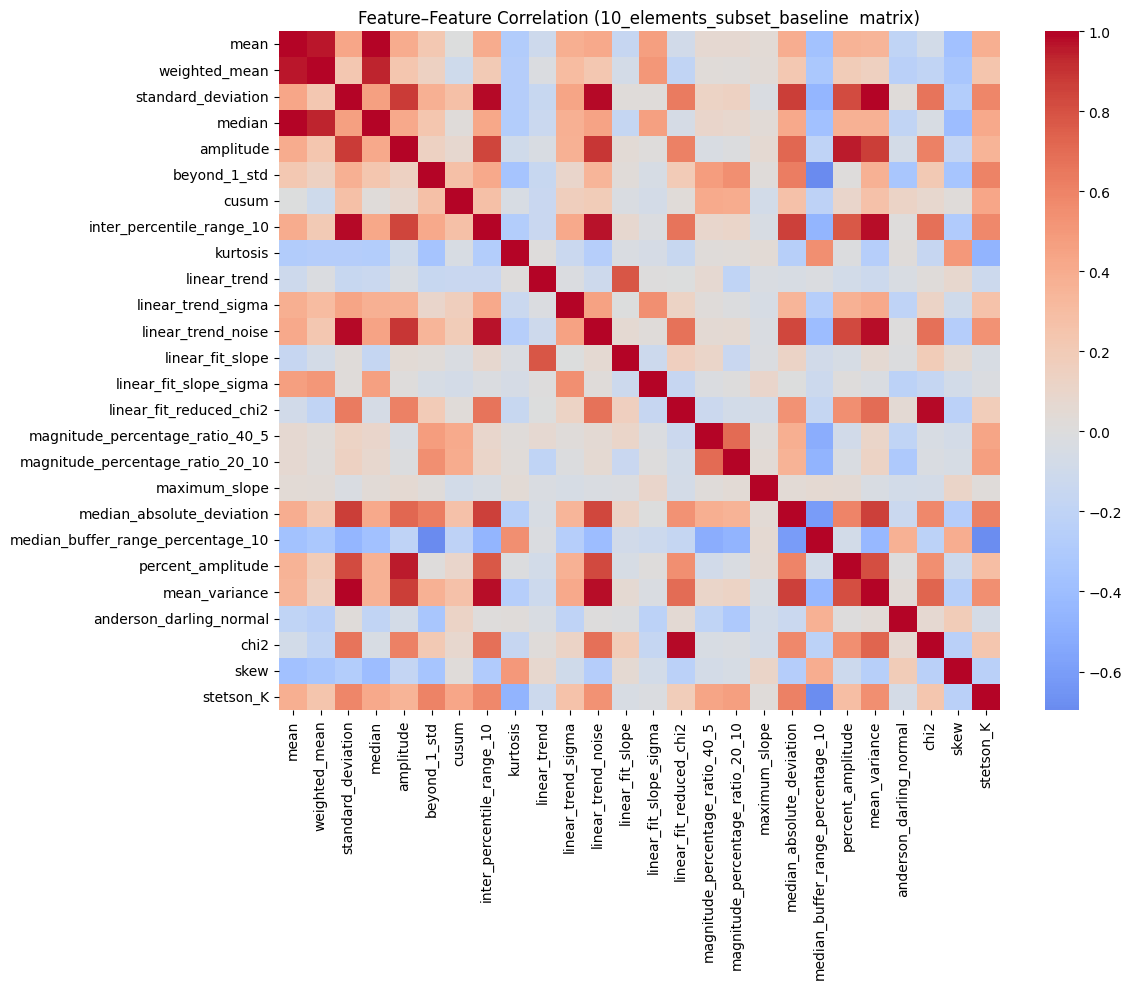

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline_subset_100, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (10_elements_subset_baseline  matrix)')
plt.tight_layout()
plt.show()

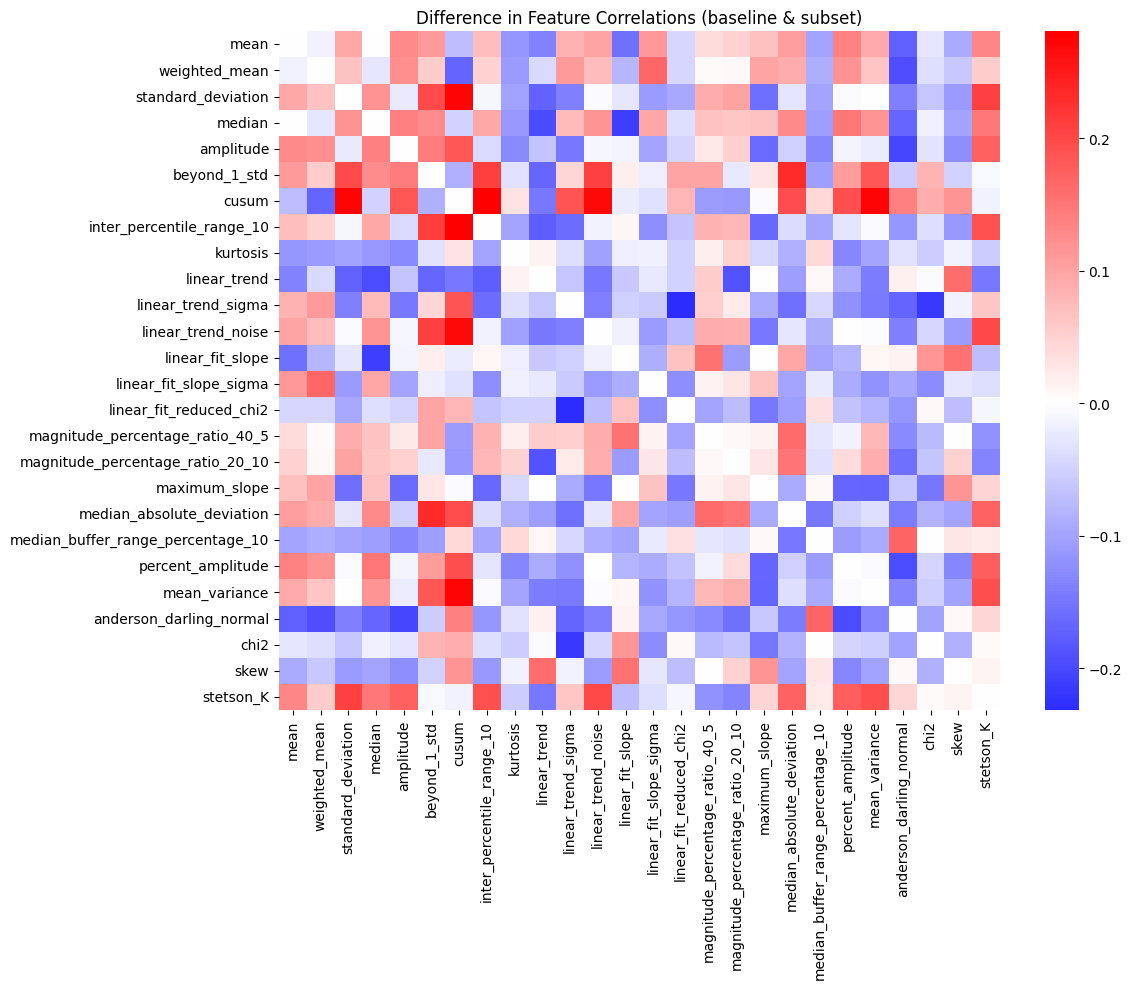

In [19]:
# corr_cv and corr_neg are correlation matrices
corr_diff_1 = corr_combined_baseline_subset_100 - corr_combined_baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_1, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset)')
plt.tight_layout()
plt.show()



In [20]:
import pandas as pd
import numpy as np
import glob

# Find all 12 parquet files
neg_files = sorted(glob.glob("negative_subset_*.parquet"))
# Store sampled dataframes
sampled_list = []
# Sample 15 rows from each subset
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 15 rows (or all if file has <10)
    n = min(15, len(df))
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"

In [21]:
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_180.parquet", index=False)


In [22]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_180.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)


In [32]:
combined.to_parquet("subset of baseline with 180neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 180neg & pos.parquet'")
print("Total rows:", len(combined))

Combined and shuffled dataset saved as 'subset of baseline with 180neg & pos.parquet'
Total rows: 340


In [24]:
df_combined_baseline_subset_15 = pd.read_parquet("subset of baseline with 180neg & pos.parquet")
features_combined_baseline_subset_15 = df_combined_baseline_subset_15 .drop(columns=['object_name','cluster'], errors='ignore')
features_combined_baseline_subset_15_numeric = features_combined_baseline_subset_15.select_dtypes(include='number')
corr_combined_baseline_subset_15 = features_combined_baseline_subset_15_numeric.corr()

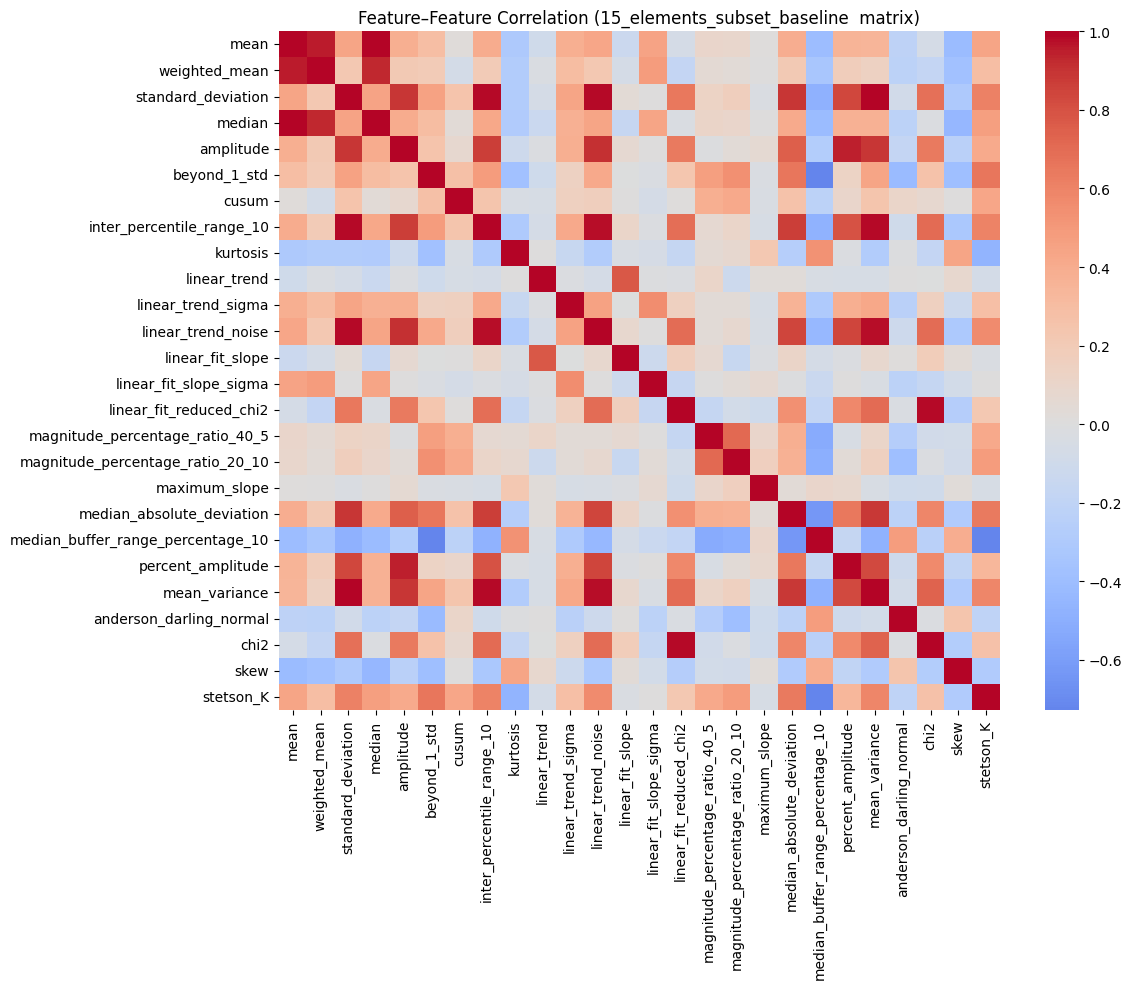

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline_subset_15, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (15_elements_subset_baseline  matrix)')
plt.tight_layout()
plt.show()

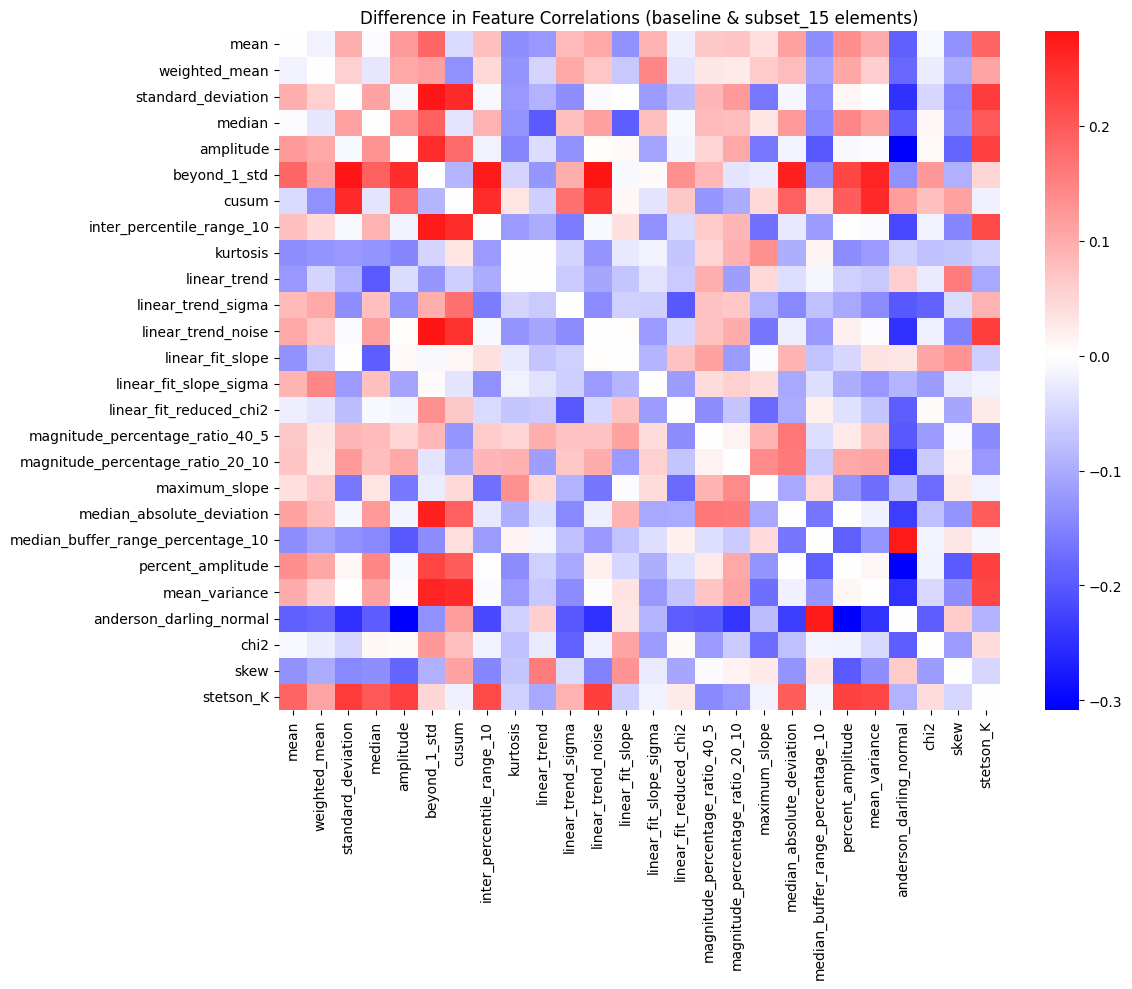

In [26]:
# corr_cv and corr_neg are correlation matrices
corr_diff_2 = corr_combined_baseline_subset_15 - corr_combined_baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_2, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_15 elements)')
plt.tight_layout()
plt.show()



In [27]:
import pandas as pd
import numpy as np
import glob

# Find all 12 parquet files
neg_files = sorted(glob.glob("negative_subset_*.parquet"))
# Store sampled dataframes
sampled_list = []
# Sample 20 rows from each subset
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 20 rows (or all if file has <10)
    n = min(20, len(df))
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"

In [28]:
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_240.parquet", index=False)


In [36]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_240.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined.to_parquet("subset of baseline with 240neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 240neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 240neg & pos.parquet'
Total rows: 340


In [37]:
df_combined_baseline_subset_20 = pd.read_parquet("subset of baseline with 240neg & pos.parquet")
features_combined_baseline_subset_20 = df_combined_baseline_subset_20 .drop(columns=['object_name','cluster'], errors='ignore')
features_combined_baseline_subset_20_numeric = features_combined_baseline_subset_20.select_dtypes(include='number')
corr_combined_baseline_subset_20 = features_combined_baseline_subset_20_numeric.corr()

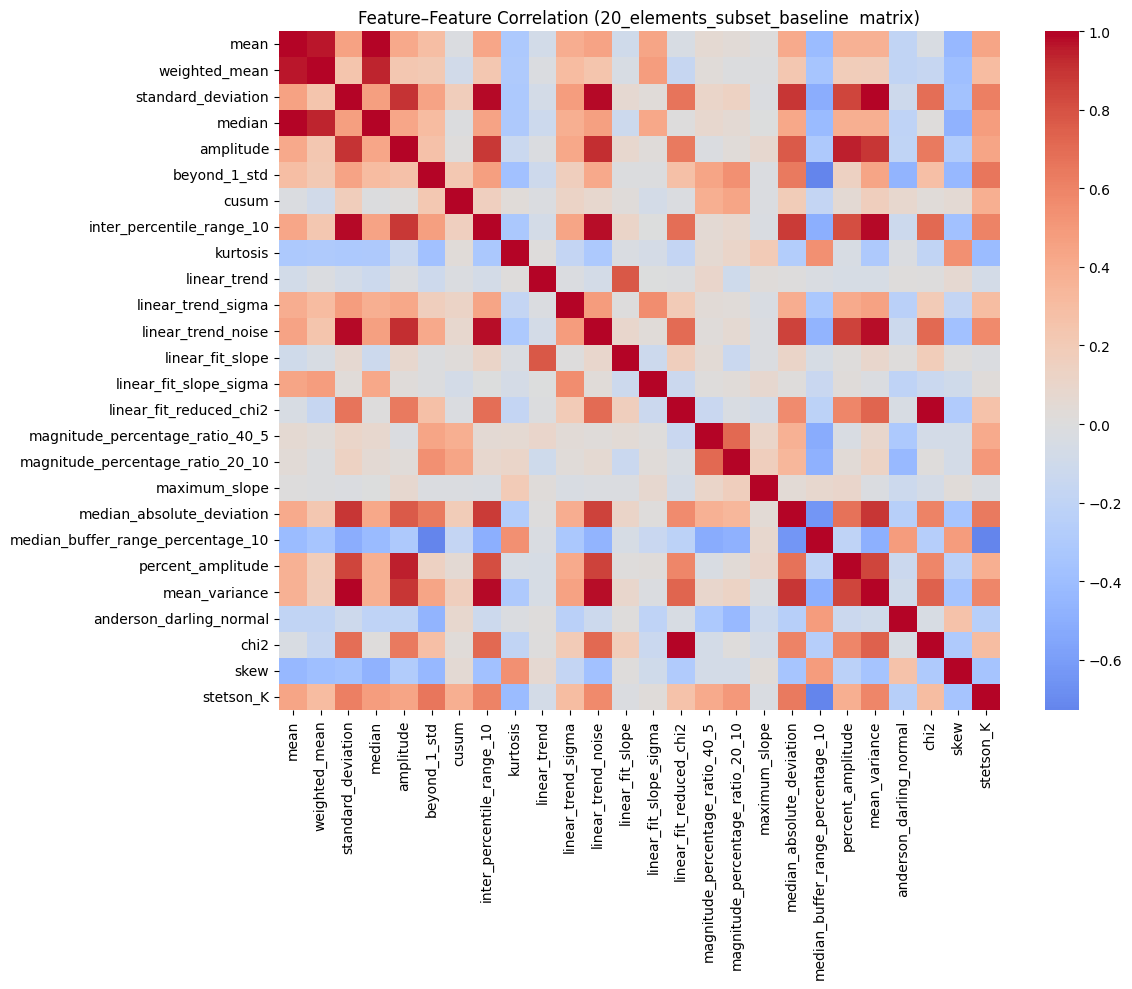

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline_subset_20, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (20_elements_subset_baseline  matrix)')
plt.tight_layout()
plt.show()

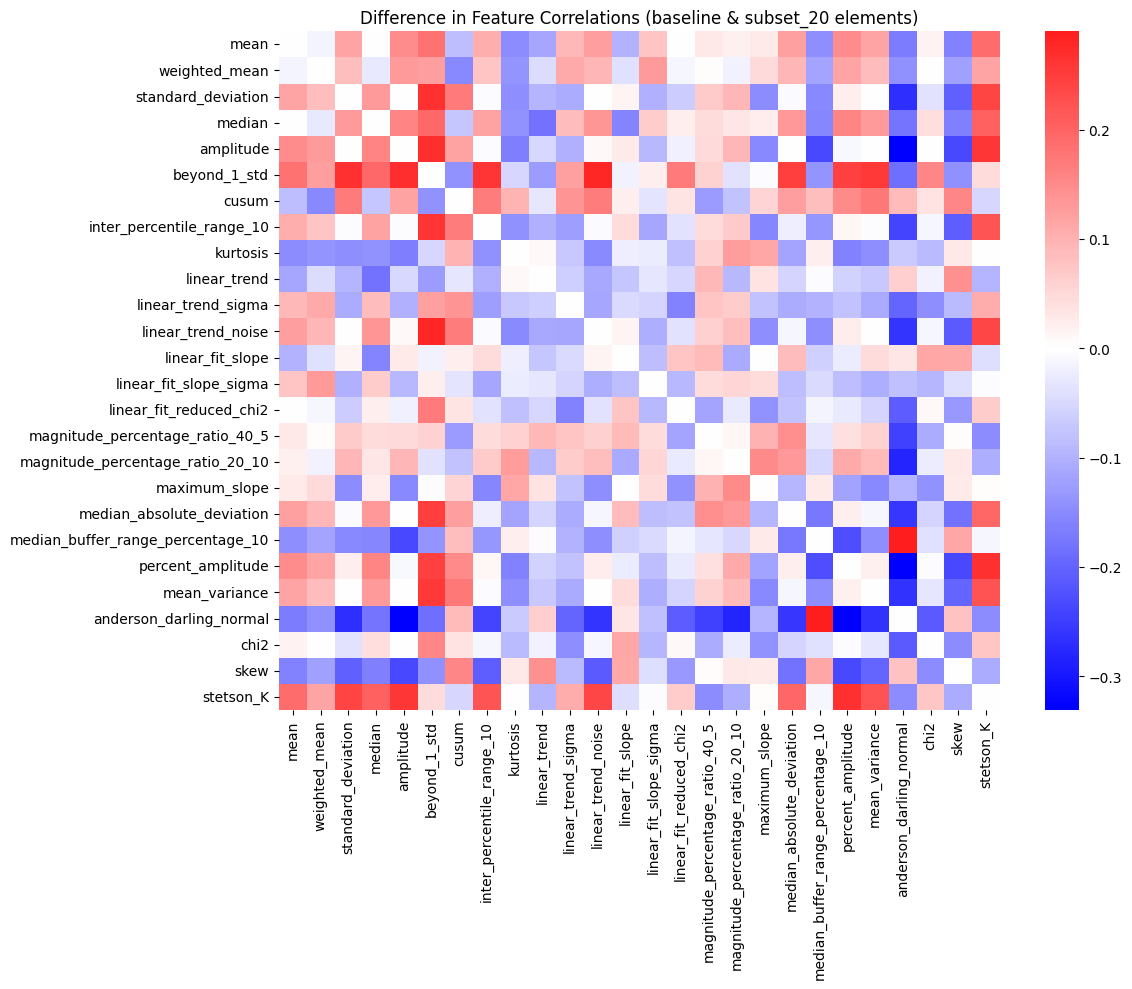

In [39]:
# corr_cv and corr_neg are correlation matrices
corr_diff_3 = corr_combined_baseline_subset_20 - corr_combined_baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_3, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_20 elements)')
plt.tight_layout()
plt.show()



In [40]:
import pandas as pd
import numpy as np
import glob

# Find all 12 parquet files
neg_files = sorted(glob.glob("negative_subset_*.parquet"))
# Store sampled dataframes
sampled_list = []
# Sample 25 rows from each subset
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 25 rows (or all if file has <10)
    n = min(25, len(df))
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_300.parquet", index=False)


In [41]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_300.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined.to_parquet("subset of baseline with 300neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 300neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 300neg & pos.parquet'
Total rows: 400


In [42]:
df_combined_baseline_subset_25 = pd.read_parquet("subset of baseline with 300neg & pos.parquet")
features_combined_baseline_subset_25 = df_combined_baseline_subset_25 .drop(columns=['object_name','cluster'], errors='ignore')
features_combined_baseline_subset_25_numeric = features_combined_baseline_subset_25.select_dtypes(include='number')
corr_combined_baseline_subset_25 = features_combined_baseline_subset_25_numeric.corr()

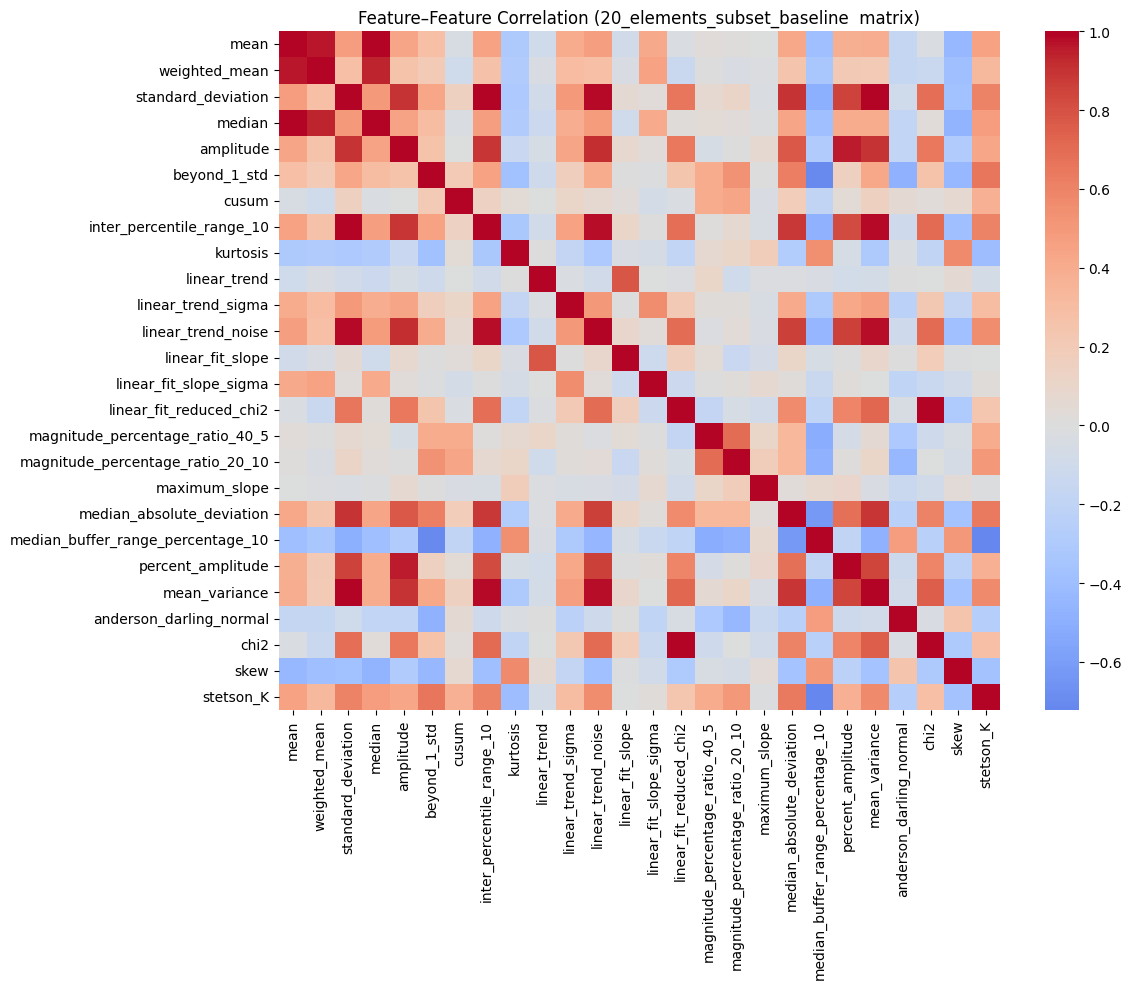

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline_subset_25, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (20_elements_subset_baseline  matrix)')
plt.tight_layout()
plt.show()

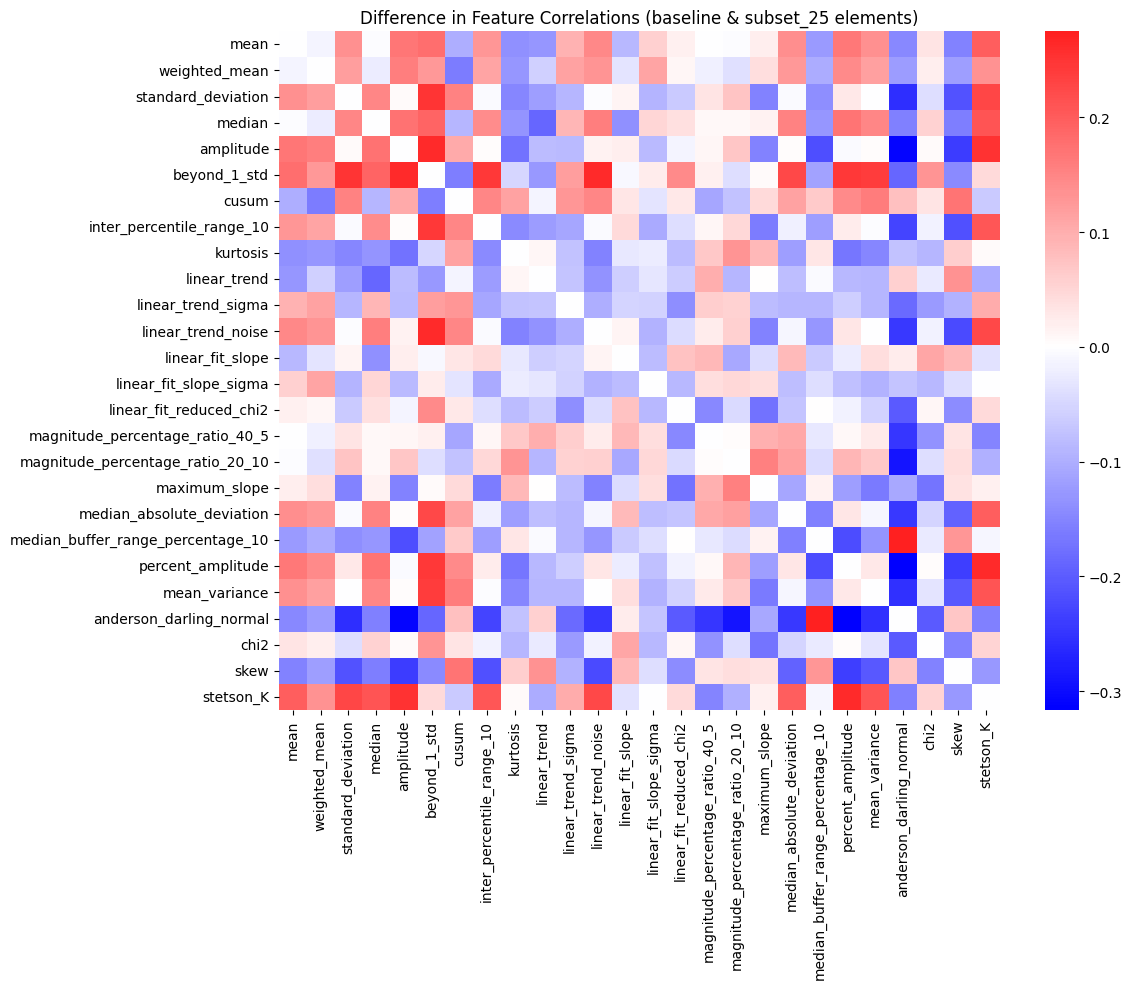

In [44]:
# corr_cv and corr_neg are correlation matrices
corr_diff_4 = corr_combined_baseline_subset_25 - corr_combined_baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_4, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_25 elements)')
plt.tight_layout()
plt.show()



In [45]:
import pandas as pd
import numpy as np
import glob

# Find all 12 parquet files
neg_files = sorted(glob.glob("negative_subset_*.parquet"))
# Store sampled dataframes
sampled_list = []
# Sample 30 rows from each subset
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 30 rows (or all if file has <10)
    n = min(30, len(df))
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_360.parquet", index=False)


In [46]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_360.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined.to_parquet("subset of baseline with 360neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 360neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 360neg & pos.parquet'
Total rows: 460


In [47]:
df_combined_baseline_subset_30 = pd.read_parquet("subset of baseline with 360neg & pos.parquet")
features_combined_baseline_subset_30 = df_combined_baseline_subset_30 .drop(columns=['object_name','cluster'], errors='ignore')
features_combined_baseline_subset_30_numeric = features_combined_baseline_subset_30.select_dtypes(include='number')
corr_combined_baseline_subset_30 = features_combined_baseline_subset_30_numeric.corr()

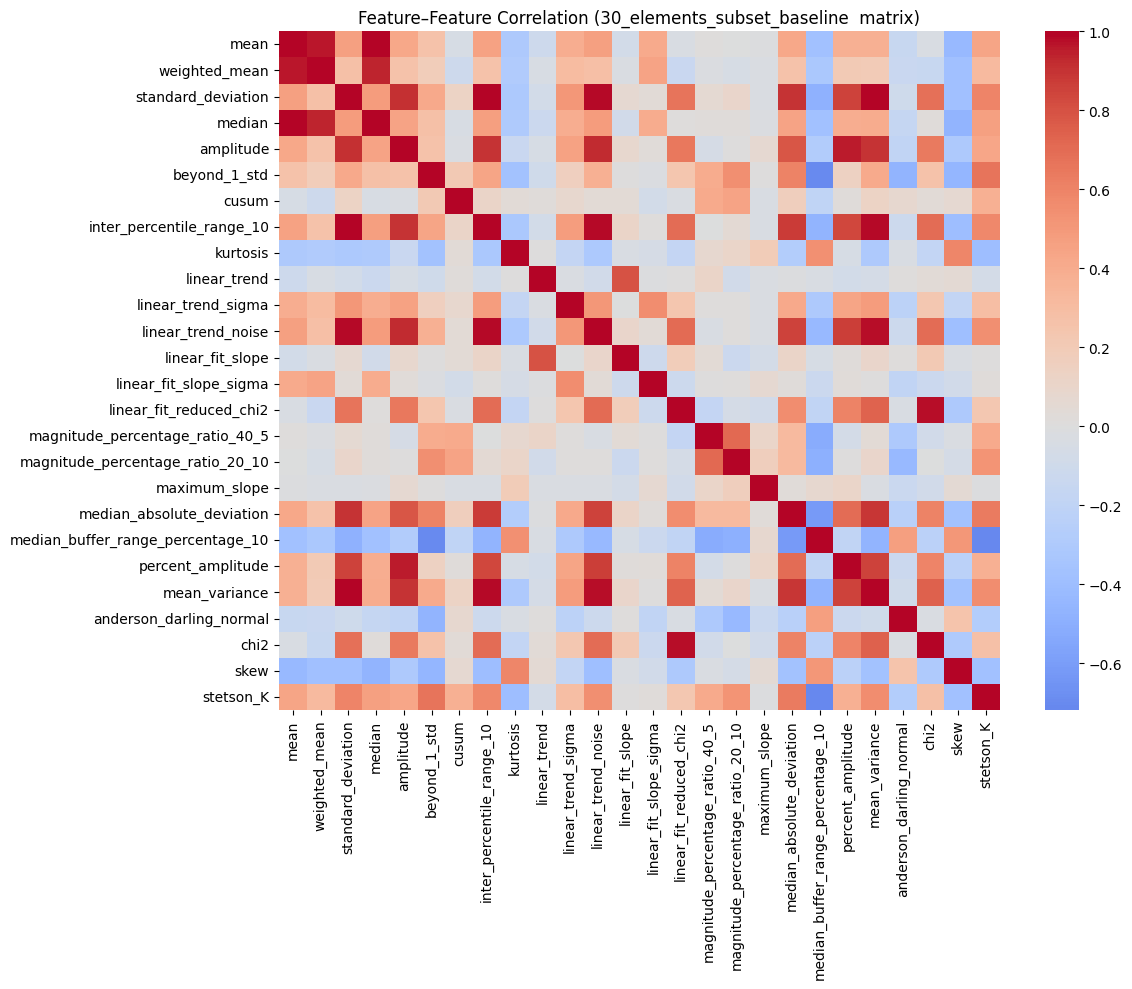

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline_subset_30, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (30_elements_subset_baseline  matrix)')
plt.tight_layout()
plt.show()

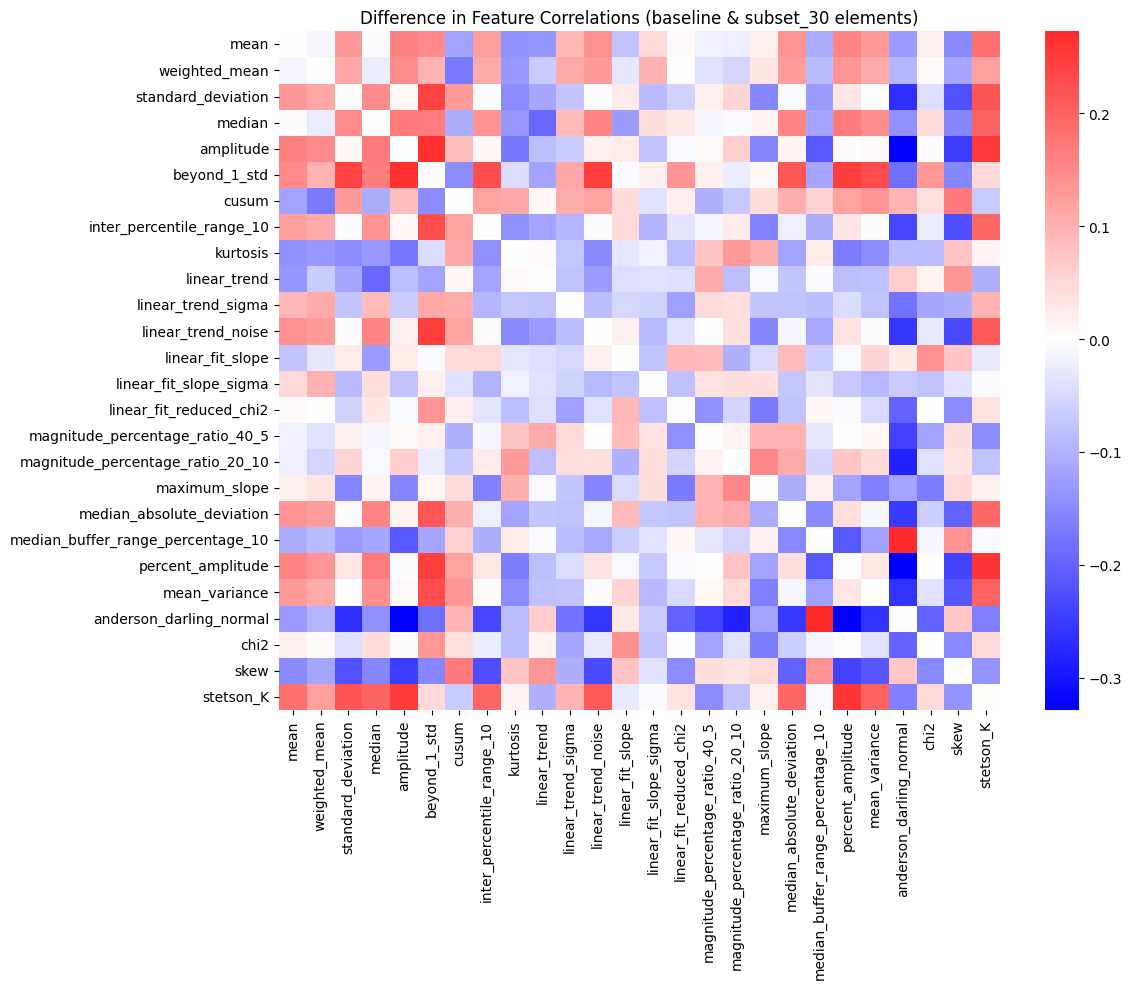

In [54]:
# corr_cv and corr_neg are correlation matrices
corr_diff_5 = corr_combined_baseline_subset_30 - corr_combined_baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_5, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_30 elements)')
plt.tight_layout()
plt.show()



In [55]:
import pandas as pd
import numpy as np
import glob

# Find all 12 parquet files
neg_files = sorted(glob.glob("negative_subset_*.parquet"))
# Store sampled dataframes
sampled_list = []
# Sample 35 rows from each subset
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 35 rows (or all if file has <10)
    n = min(35, len(df))
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_420.parquet", index=False)


In [56]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_420.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined.to_parquet("subset of baseline with 420neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 420neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 420neg & pos.parquet'
Total rows: 520


In [57]:
df_combined_baseline_subset_35 = pd.read_parquet("subset of baseline with 360neg & pos.parquet")
features_combined_baseline_subset_35 = df_combined_baseline_subset_35 .drop(columns=['object_name','cluster'], errors='ignore')
features_combined_baseline_subset_35_numeric = features_combined_baseline_subset_35.select_dtypes(include='number')
corr_combined_baseline_subset_35 = features_combined_baseline_subset_35_numeric.corr()

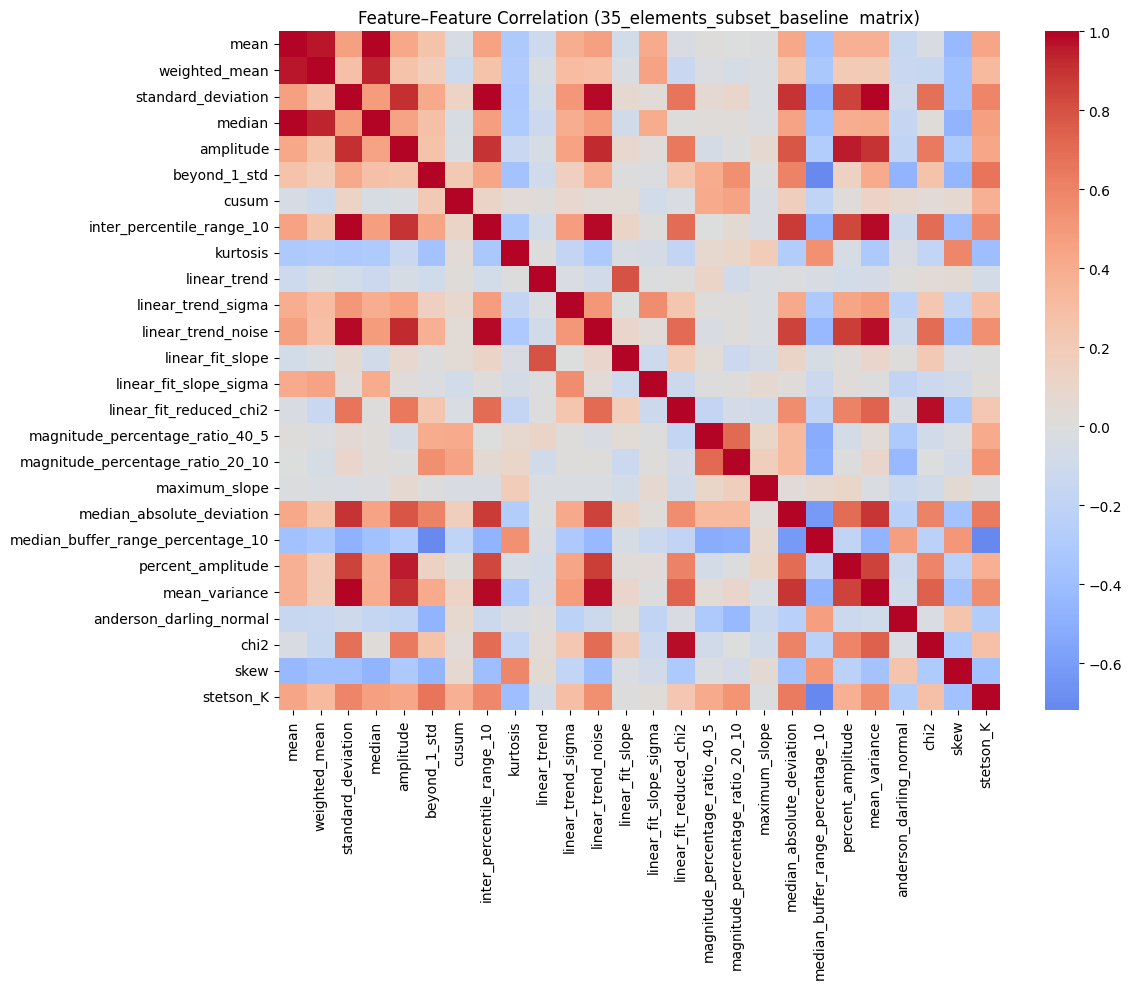

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline_subset_35, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (35_elements_subset_baseline  matrix)')
plt.tight_layout()
plt.show()

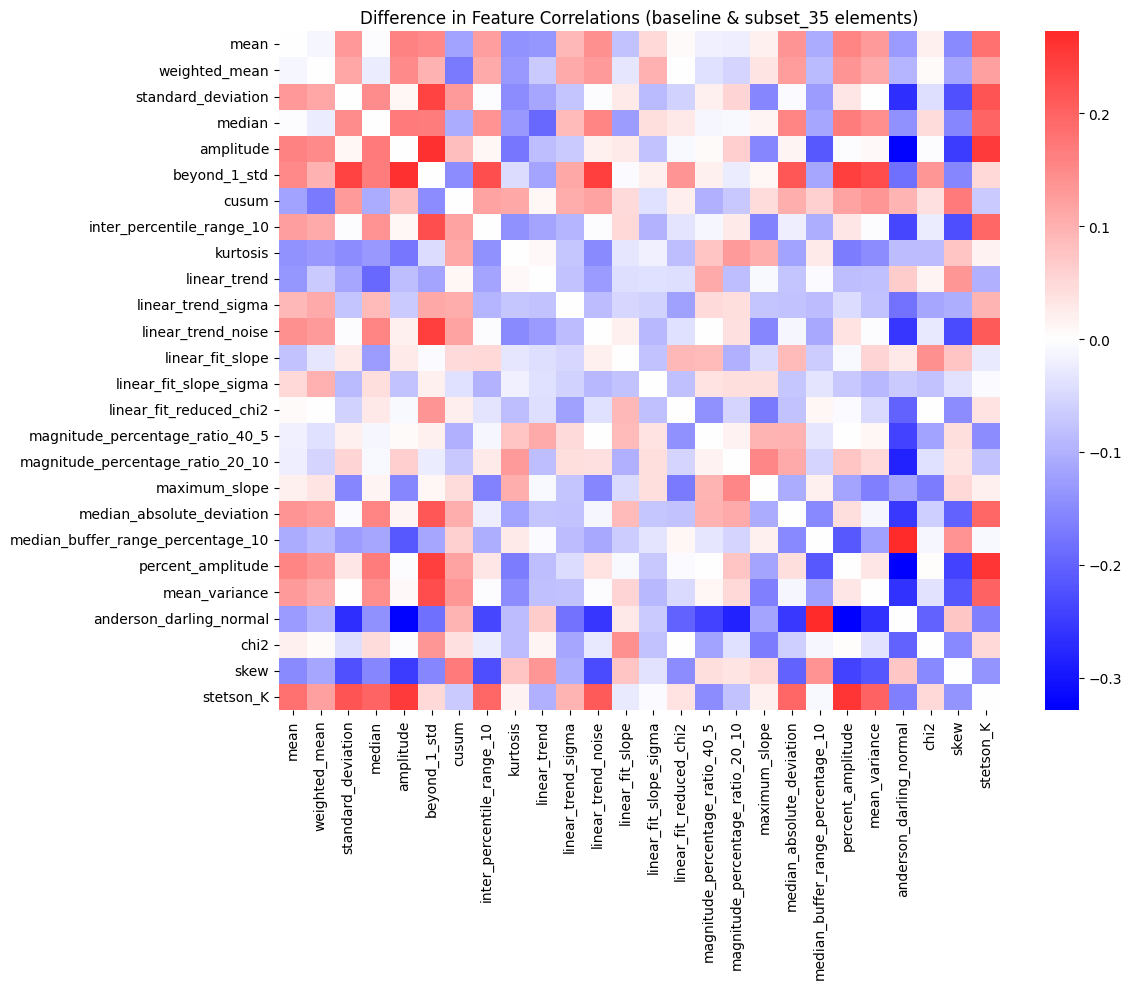

In [59]:
# corr_cv and corr_neg are correlation matrices
corr_diff_6 = corr_combined_baseline_subset_35 - corr_combined_baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_6, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_35 elements)')
plt.tight_layout()
plt.show()

